In [31]:
import Pkg
Pkg.add("Clp")
Pkg.add("Cbc")
Pkg.add("Ipopt")
Pkg.add("NLopt")
Pkg.add("JuMP")
Pkg.add("PyPlot")
Pkg.add("Polyhedra")
Pkg.add("CDDLib")
Pkg.add("LinearAlgebra")

   Resolving package versions...


  No Changes to `C:\Users\linco\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\linco\.julia\environments\v1.9\Manifest.toml`


   Resolving package versions...


   Installed Cbc ───── v1.2.0


   Installed Cgl_jll ─ v0.6000.600+0
   Installed Cbc_jll ─ v200.1000.800+0


    Updating `C:\Users\linco\.julia\environments\v1.9\Project.toml`
  [9961bab8] + Cbc v1.2.0
    Updating `C:\Users\linco\.julia\environments\v1.9\Manifest.toml`


  [9961bab8] + Cbc v1.2.0
  [38041ee0] + Cbc_jll v200.1000.800+0
  [3830e938] + Cgl_jll v0.6000.600+0


Precompiling

 project...


  ✓ Cgl_jll


  ✓ Cbc_jll


  ✓ Cbc
  3 dependencies successfully precompiled in 16 seconds. 91 already precompiled.
   Resolving package versions...


  No Changes to `C:\Users\linco\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\linco\.julia\environments\v1.9\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\linco\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\linco\.julia\environments\v1.9\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\linco\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\linco\.julia\environments\v1.9\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\linco\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\linco\.julia\environments\v1.9\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\linco\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\linco\.julia\environments\v1.9\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\linco\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\linco\.julia\environments\v1.9\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\linco\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\linco\.julia\environments\v1.9\Manifest.toml`

In [2]:
@time using Ipopt
@time using JuMP
@time using PyPlot
@time using LinearAlgebra

  8.400882 seconds (3.18 M allocations: 190.930 MiB, 1.84% gc time, 0.41% compilation time)


  1.041585 seconds (539.17 k allocations: 32.979 MiB)


 15.012353 seconds (2.48 M allocations: 166.928 MiB, 1.39% gc time, 33.32% compilation time: 99% of which was recompilation)


  0.355691 seconds (90.48 k allocations: 6.386 MiB, 99.12% compilation time: 100% of which was recompilation)


In [3]:
versioninfo()

Julia Version 1.9.3
Commit bed2cd540a (2023-08-24 14:43 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 8 × AMD FX(tm)-8350 Eight-Core Processor           
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, bdver1)
  Threads: 1 on 8 virtual cores
Environment:
  JULIA_NUM_THREADS = 


### Problema 1 (formulação matemática de problema geométrico): 

Determine o triângulo de área mínima contendo dois círculos de raio um que são disjuntos (i.e., <b> não </b> se intersetam). Para assegurar uniformidade de notação (e facilitar a correção), sejam os vértices do triângulo localizados nos pontos $(0,0), (x_1,0),(x_2,x_3)$ e os centros dos círculos no triângulo $(x_4,x_5)$, $(x_6,x_7)$. Formule como problema de otimização, explicitando função objetivo, variáveis de decisão, e restrições. A sua formulação resultou em qual tipo de problema de otimização? 

<b>Sugestão</b>: Utilize a formula para a distância entre um ponto e uma reta discutida na aula 4 (slide 4-17).

# Rascunho


<img src="Rascunho.PNG">

In [4]:
#Inserir resposta 1using JuMP
using Ipopt
using LinearAlgebra

m = Model(Ipopt.Optimizer)
@variable(m, x[1:7] >= 0)

set_start_value.(x, [10,10,10,4,4,6,6])


# Distancia entre x4, x5 e x6, x7 deve ser 2r = 2
@NLconstraint(m, (x[4] - x[6])^2 + (x[5] - x[7])^2 >= 4)

# Restrição das paredes do triângulo: a distância entre o centro dos círculos e qualquer parede deve ser > 1
# Reescrevendo a formula da distancia, temos: r = (b - a^Ty)/norm(a). Portanto r >= 1
# Vetores normais às paredes
a1 = [0, -1]
a2 = [x[3], x[1] - x[2]]
a3 = [-x[3], x[2]]

# b1, b2 e b3
b1 = 0
b2 = x[3] * x[1]
b3 = 0

# Restrições
for (a, b) in zip([a1, a2, a3], [b1, b2, b3])
    # Círculo 1
    @NLconstraint(m, (b - (a[1]*x[4] + a[2]*x[5])) / ((a[1]^2 + a[2]^2)^0.5) >= 1)
    # Círculo 2
    @NLconstraint(m, (b - (a[1]*x[6] + a[2]*x[7])) / ((a[1]^2 + a[2]^2)^0.5) >= 1)
end

# função objetivo x1 * x3 / 2 -> área do triângulo
@objective(m, Min, x[1] * x[3] / 2)

# Otimização
optimize!(m)

println("Estado de término: ", termination_status(m))
println("x = ", value.(x))
println("distancia das circunferencias: ", ((value(x[4]) - value(x[6]))^2 + (value(x[5]) - value(x[7]))^2)^0.5)
println("f(x) = ", objective_value(m))



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       26
Number of nonzeros in Lagrangian Hessian.............:       57

Total number of variables............................:        7
                     variables with only lower bounds:        7
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality c

x = 

[4.828427095300941, 4.828427113604421, 4.828427087557588, 2.4142135489956487, 0.9999999905188672, 3.8284271139339277, 2.4142135478291875]
distancia das circunferencias: 

1.9999999982339365


f(x) = 11.656854088624033


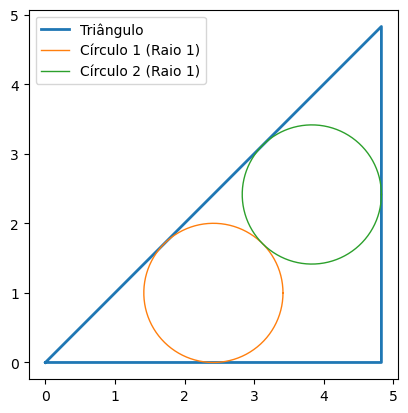

In [23]:
using PyPlot
clf()
# Dados após a otimização
x_opt = value.(x)

# Coordenadas dos vértices do triângulo
x1, x2, x3 = x_opt[1], x_opt[2], x_opt[3]

# Coordenadas dos centros dos círculos
x4, x5 = x_opt[4], x_opt[5]
x6, x7 = x_opt[6], x_opt[7]

# Coordenadas dos vértices do triângulo
vertices_x = [0, x1, x2, 0]
vertices_y = [0, 0, x3, 0]

# Ângulo para plotar as circunferências
θ = LinRange(0, 2π, 100)

# Coordenadas dos pontos das circunferências
circle1_x = x4 .+ cos.(θ)
circle1_y = x5 .+ sin.(θ)

circle2_x = x6 .+ cos.(θ)
circle2_y = x7 .+ sin.(θ)

# Configurando a figura usando PyPlot
fig, ax = subplots()

# Plotagem do triângulo e das circunferências
ax.plot(vertices_x, vertices_y, label="Triângulo", lw=2)
ax.plot(circle1_x, circle1_y, label="Círculo 1 (Raio 1)", lw=1)
ax.plot(circle2_x, circle2_y, label="Círculo 2 (Raio 1)", lw=1)

# Configurações adicionais do gráfico
ax.set_aspect("equal")
ax.legend()

# Exibir a figura
display(fig)

### Problema 2 (Ajuste de uma curva constante por pedaços)

Considere um sinal ruidoso (sequência de pontos) que é aproximadamente constante por pedaços, como ilustrado na Figura abaixo:
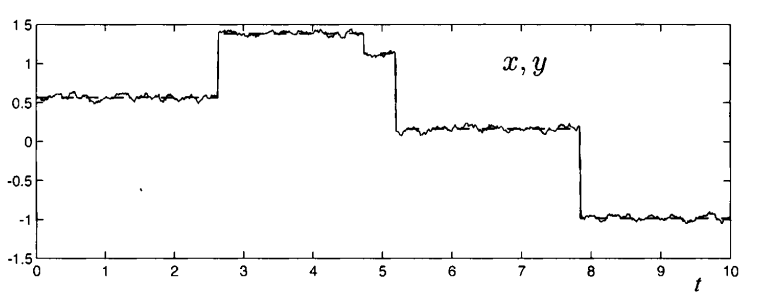

Na figura, $x \in R^n$ representa o sinal desconhecido constante por pedaços e $y$ representa a versão ruidosa medida dd sinal $x$ (ou seja, $y$ é o sinal original $x$ mais ruido). Dado $y$, gostaríamos de computar uma estimativa $\hat{x}$ do sinal original $x$ tal que $\hat{x}$ tenha o menor número de mudanças em instantes consecutivos. Modelamos esta exigência minimizando o número de elementos não-nulos do vetor de diferenças $D\hat{x}$, sendo $D \in R^{(n-1)\times n}$ a matriz de diferenças
$$
D = \begin{bmatrix} 
-1 & 1 & 0 & \cdots & 0 \\
0 & -1 & 1 & \vdots & 0 \\
\vdots & & & \ddots & \\
0 & \cdots & 0 & -1 & 1
\end{bmatrix}
$$
o que significa que $D\hat{x} = \left[\hat{x}_2 - \hat{x}_1, \hat{x}_3 - \hat{x}_2, \ldots , \hat{x}_n - \hat{x}_{n-1}\right]^T$. Com esta definição de $D$, chega-se ao problema de otimização:
\begin{align}
& \min_{\hat{x}} \|y - \hat{x}\|_2^2 \\
& \text{s.a.}~\text{card} (D\hat{x}) \leq k
\end{align}
sendo card($D\hat{x}$) = número de elementos não-nulos de $D\hat{x}$, e $k$ uma estimativa do número de saltos (degraus) no sinal. Este problema é difícil de resolver, pois $\text{card}(\cdot)$ é uma função descontínua, e pode ser substituído pela versão regularizada
\begin{equation}
\min_{\hat{x}} \|y - \hat{x}\|_2^2  + \gamma \| (D\hat{x}) \|_p
\end{equation}
sendo $\gamma$ o parâmetro de regularização. Resolva o problema regularizado para $p = 1, 2$:

- indicando claramente que tipo de problema você está resolvendo (LP, QP, QCQP etc.)
- plotando os gráficos do sinal reconstruído (=estimado) e o sinal original, comentando as características das soluções obtidas.

Gere seu sinal de ruído considerando que o sinal original é descrito por:
$$
x = \left\{
\begin{array}{l}
k_1 = 0.5,~\text{se}~t \in [0,2.8) \\
k_2 = 1.5,~\text{se}~t \in [2.8,4.8) \\
k_3 = 1.1,~\text{se}~t \in [4.8,5.2) \\
k_4 = 0.1,~\text{se}~t \in [5.2,7.9)\\
k_5 = -1,~\text{se}~t \in  [7.9,10]
\end{array}
\right.
$$
e que o sinal ruidoso $y$ é gerado a partir de $x$, acrescentando um ruido gaussiano de média $k_i$ e variância $0.01$ ao $i$-ésimo trecho constante de $x$. Forneça o par de sinais $x,y$ no *notebook* entregue. Para o problema proposto, trabalhe com 100 amostras igualmente espaçadas dos sinais contínuos gerados.

# Solução

In [108]:
#Inicialmente, para gerar os sinais, temos:

# Função para gerar sinais x e y
function criar_sinais()
    tempo = collect(range(0, stop=10, length=100))
    sinal_original = zeros(length(tempo))
    
    # Especificação dos pontos de divisão e valores fixos
    intervalos = [0, 2.8, 4.8, 5.2, 7.9, 10]
    amplitudes = [0.5, 1.5, 1.1, 0.1, -1]
    
    for i in 1:length(intervalos)-1
        máscara = (intervalos[i] .<= tempo .< intervalos[i+1])
        sinal_original[máscara] .= amplitudes[i]
    end
    
    # Introdução de ruído gaussiano
    ruído = randn(length(tempo)) * 0.1  # Variância = 0.01
    sinal_modificado = sinal_original + ruído
    
    return sinal_original, sinal_modificado, tempo
end

# Gerarando x, y e t
x_real, y, t = criar_sinais()

([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5  …  -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.297901102843098, 0.4935879360114925, 0.47845349323382813, 0.7580701626086865, 0.4195109276381848, 0.5280661416171497, 0.45176075143500083, 0.46823374377632965, 0.49531264065761066, 0.37888554992480833  …  -1.0263804754257801, -1.004944442877902, -1.1111702244938195, -1.0827587846540612, -0.9634423322593676, -1.070714877700714, -0.9847906282902711, -1.1852500651273452, -1.0132662471583258, -0.09343531910186749], [0.0, 0.10101010101010101, 0.20202020202020202, 0.30303030303030304, 0.40404040404040403, 0.5050505050505051, 0.6060606060606061, 0.7070707070707071, 0.8080808080808081, 0.9090909090909091  …  9.090909090909092, 9.191919191919192, 9.292929292929292, 9.393939393939394, 9.494949494949495, 9.595959595959595, 9.696969696969697, 9.797979797979798, 9.8989898989899, 10.0])

### Reconstruindoo sinal

In [109]:
function criar_matriz_diferencas(n)
    D = zeros(n-1, n)
    
    for i in 1:n-1
        D[i, i] = -1
        D[i, i+1] = 1
    end
    
    return D
end

D = criar_matriz_diferencas(length(t))

m = Model(Ipopt.Optimizer)
set_optimizer_attribute(m, "print_level", 0)

# Variáveis de decisão
@variable(m, x_hat[1:length(t)])
@variable(m, i[1:length(t)-1]) # Truque do epígrafo

# Função objetivo para regularização com norma 1
gamma = 0.5
@objective(m, Min, sum((y - x_hat).^2) + gamma*sum(i))

# Restrições
@constraint(m, i .>= D*x_hat)
@constraint(m, i .>= -D*x_hat)

# Otimização
optimize!(m) # O problema é um QP, pois não possui restrições não-lineares e a função objetivo é quadrática

# Sinal reconstruído
x_hat_1_norm= value.(x_hat)

100-element Vector{Float64}:
  0.4822277746923574
  0.48222779088609163
  0.4822278041888266
  0.48222781835573575
  0.482227813641536
  0.48222781215114574
  0.48222780845460733
  0.48222780628656325
  0.48222780473717336
  0.482227802610533
  ⋮
 -1.0011598174137315
 -1.00115982726047
 -1.001159829048674
 -1.0011598274746483
 -1.0011598274498947
 -1.001159824395743
 -1.0011598221337645
 -1.0011597212079495
 -0.3434353171969126

In [133]:
function criar_matriz_diferencas(n)
    D = zeros(n-1, n)
    
    for i in 1:n-1
        D[i, i] = -1
        D[i, i+1] = 1
    end
    
    return D
end

D = criar_matriz_diferencas(length(t))

m = Model(Ipopt.Optimizer)
set_optimizer_attribute(m, "print_level", 0)

# Variáveis de decisão
@variable(m, x_hat[1:length(t)])

# Função objetivo para regularização com norma-2 ^2
gamma =0.8
@NLobjective(m, Min, dot(y-x_hat,y-x_hat) + gamma * dot(D*x_hat, D*x_hat)^0.5)

# Otimização
optimize!(m) # 

# Sinal reconstruído
x_hat_2_norm = value.(x_hat)


┌ Warning: Function dot automatically registered with 2 arguments.
│ 
│ Calling the function with a different number of arguments will result in an
│ error.
│ 
│ While you can safely ignore this warning, we recommend that you manually
│ register the function as follows:
│ ```Julia
│ model = Model()
│ register(model, :dot, 2, dot; autodiff = true)
│ ```
└ @ MathOptInterface.Nonlinear C:\Users\linco\.julia\packages\MathOptInterface\tWT4o\src\Nonlinear\operators.jl:430


ErrorException: Unexpected array [0.297901102843098, 0.4935879360114925, 0.47845349323382813, 0.7580701626086865, 0.4195109276381848, 0.5280661416171497, 0.45176075143500083, 0.46823374377632965, 0.49531264065761066, 0.37888554992480833, 0.4945733896480856, 0.47781254879550555, 0.455732644330468, 0.4401006079619875, 0.4609127348294761, 0.47929527240464886, 0.44773152424308527, 0.45460308154082374, 0.6062346071251581, 0.3900486158652279, 0.6717425480925344, 0.4963420785111167, 0.45920904191855483, 0.21934672437344133, 0.5700493162678084, 0.6168710532334527, 0.4895017983581719, 0.6420469088425862, 1.4489733265981046, 1.5038916080277596, 1.651221810160151, 1.331828585528889, 1.4600050565759477, 1.4540927162740234, 1.565864613134424, 1.451907627439143, 1.5198800288928795, 1.355083544957939, 1.4201285365120293, 1.286533911887087, 1.5462781050551802, 1.4991540684062332, 1.5096708481779388, 1.6929816849538455, 1.4654989855178266, 1.5961208321767666, 1.536617608012758, 1.5063416864637738, 0.9750943801853589, 1.174742118469355, 1.0950472487170566, 1.1144676705532595, 0.24120861651610012, 0.09858209812539018, 0.0640686833379923, -0.10398833689278794, 0.16725850607716797, -0.0007737390578557435, 0.09077527528878404, 0.05919662757683073, 0.11100794943005021, 0.10806035392850305, 0.10570680407918265, -0.060686990343074204, 0.19160893932163828, 0.1419072169638195, 0.22007685310820765, 0.13880540348905368, -0.07551597389029235, -0.04420960413042818, 0.003544561958402692, 0.18182661174235373, 0.026281880273912928, 0.06818251395639517, -0.04170438948430272, 0.2768100952187976, 0.31125971411738923, 0.2205715529480902, -0.027342320676297105, -1.0926924779385272, -1.03104916679898, -0.9394596513154082, -0.7301792178736852, -0.8930124160576979, -1.0033244259446565, -0.8268293835275606, -1.121486828062973, -0.9571917136659246, -0.9479631156921745, -1.04571752545454, -1.0263804754257801, -1.004944442877902, -1.1111702244938195, -1.0827587846540612, -0.9634423322593676, -1.070714877700714, -0.9847906282902711, -1.1852500651273452, -1.0132662471583258, -0.09343531910186749] in nonlinear expression. Nonlinear expressions may contain only scalar expressions.

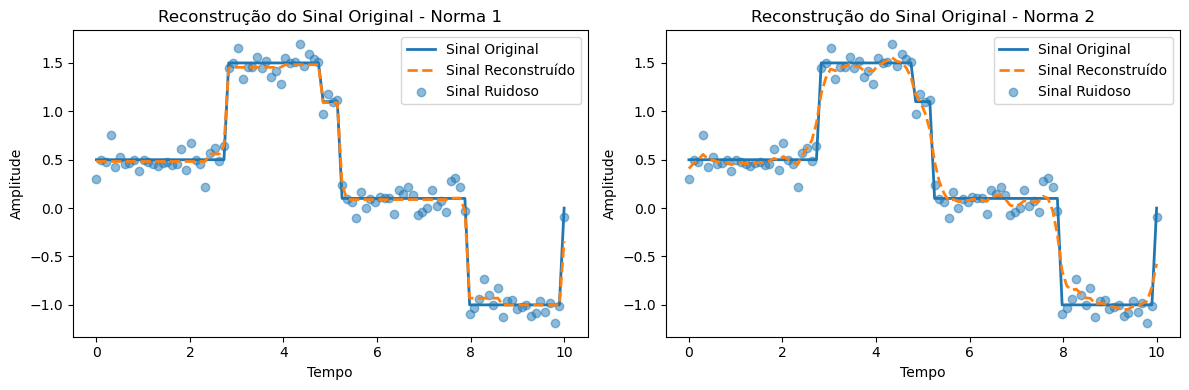

In [134]:
using PyPlot

# Criando uma figura com duas sub-figuras (subplot)
fig, axs = subplots(1, 2, figsize=(12, 4))

# Primeira sub-figura
axs[1].plot(t, x_real, label="Sinal Original", linewidth=2)
axs[1].plot(t, x_hat_1_norm, label="Sinal Reconstruído", linewidth=2, linestyle="--")
axs[1].scatter(t, y, label="Sinal Ruidoso", alpha=0.5)

axs[1].set(xlabel="Tempo", ylabel="Amplitude")
axs[1].set_title("Reconstrução do Sinal Original - Norma 1")
axs[1].legend()

# Segunda sub-figura
axs[2].plot(t, x_real, label="Sinal Original", linewidth=2)
axs[2].plot(t, x_hat_2_norm, label="Sinal Reconstruído", linewidth=2, linestyle="--")
axs[2].scatter(t, y, label="Sinal Ruidoso", alpha=0.5)

axs[2].set(xlabel="Tempo", ylabel="Amplitude")
axs[2].set_title("Reconstrução do Sinal Original - Norma 2")
axs[2].legend()

# Exibe a figura
tight_layout()
display(fig)


### Problema 3 (Regressão $L_2$ versus regressão $L_1$):
É comum encontrar conjuntos de dados contendo *outliers*, ou seja, dados ruins oriundos de erro experimental, ruido alto ou malfuncionamento de sensores. Considere por exemplo o seguinte conjunto de 15 pares $(x,y)$ de pontos experimentais:


|x |	1 |	2 |	3 |	4 |	5 |	6 |	7 |	8 |	9 |	10 |	11 |	12 |	13 |	14 |	15 |
|--|------|---|---|---|---|---|---|---|---|----|-------|-------|-------|-------|-------|
|y |	6.31 |	3.78 |	24 |	1.71 |	2.99 |	4.53 |	2.11 |	3.88 |	4.67 |	4.25 |	2.06 |	23 |	1.58 |	2.17 |	0.02  |

Os valores de $y$ correspondentes a $x=3$ and $x=12$ são outliers porque estão muito distantes do intervalo de valores esperado no experimento.

(a) Compute a reta de melhor ajuste usando um custo $L_2$ cost (i.e., mínimos quadrados). Ou seja, encontre $a$ e $b$ that que minimizem a expressão:
$$
	L_2~\text{custo}:~\sum_{i=1}^{15} (y_i - ax_i - b)^2
$$

Repita o cálculo da reta de melhor ajuste, porém, desta vez, exclua os outliers do conjunto de dados. No mesmo plot, mostre os dados (todos) e ambas retas de melhor ajuste. Explique a diferença entre as duas retas de melhor ajuste.

(b) Nem sempre é possível remover outliers manualmente. Vamos investigar um método auotmático de reduzir o efeito de outliers, através da troca da função objetivo. Encontre a reta de melhor ajuste de novo (**sem** retirar os outliers), porém desta vez utilize a função de custo $L_1$:
$$
	L_1~\text{custo}:~\sum_{i=1}^{15} \left| y_i - ax_i - b \right|
$$
Plote os dados bem como a reta de melhor ajuste $L_1$. O que você observa sobre a influência de outliers na reta de melhor ajuste $L_1$? O custo $L_1$ lida melhor com outliers do que o método de mínimos quadrados? Explique sua resposta. 

### 3-a)

In [66]:
using JuMP, Ipopt

# Dados de entrada
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02]

# Modelo de otimização
m = Model(Ipopt.Optimizer)

# Variáveis de decisão
@variable(m, a)
@variable(m, b)

# Função objetivo (mínimos quadrados)
@objective(m, Min, sum((y[i] - a * x[i] - b)^2 for i in 1:length(x)))

# Otimização
optimize!(m)

# Coeficientes do ajuste L2
a_L2_optimal = value(a)
b_L2_optimal = value(b)

# Valores previstos pela reta de melhor ajuste (com todos os dados)
y_previsto_optimal = a_L2_optimal * x .+ b_L2_optimal

# Excluindo os outliers (x=3 e x=12)
indices_sem_outliers = filter(i -> i ∉ [3, 12], 1:length(x))
x_sem_outliers = x[indices_sem_outliers]
y_sem_outliers = y[indices_sem_outliers]

# Modelo de otimização para ajuste L2 sem outliers
m_sem_outliers = Model(Ipopt.Optimizer)
@variable(m_sem_outliers, a)
@variable(m_sem_outliers, b)
@objective(m_sem_outliers, Min, sum((y_sem_outliers[i] - a * x_sem_outliers[i] - b)^2 for i in 1:length(x_sem_outliers)))
optimize!(m_sem_outliers)

# Coeficientes do ajuste L2 sem outliers
a_L2_sem_outliers_optimal = value(a)
b_L2_sem_outliers_optimal = value(b)

# Valores previstos pela reta de melhor ajuste (sem outliers)
y_previsto_sem_outliers_optimal = a_L2_sem_outliers_optimal * x .+ b_L2_sem_outliers_optimal


This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.2623168e+03 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

15-element Vector{Float64}:
 4.755119124275597
 4.518634900193175
 4.282150676110754
 4.045666452028333
 3.8091822279459113
 3.57269800386349
 3.336213779781069
 3.099729555698648
 2.8632453316162265
 2.626761107533805
 2.390276883451384
 2.1537926593689627
 1.9173084352865417
 1.6808242112041203
 1.4443399871216993

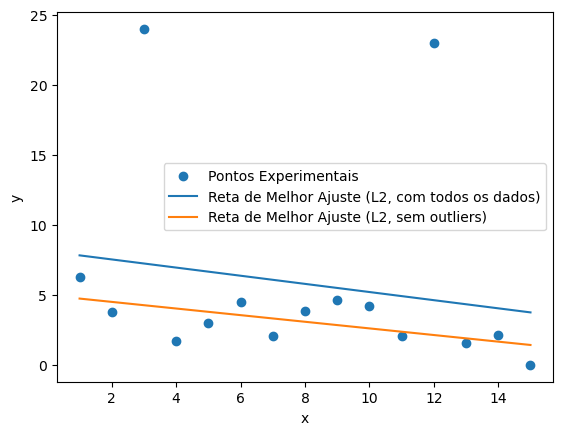

In [67]:
using PyPlot

# Criar uma nova figura
figure()

# Plotagem dos pontos e das retas de melhor ajuste
scatter(x, y, label="Pontos Experimentais")
plot(x, y_previsto, label="Reta de Melhor Ajuste (L2, com todos os dados)")
plot(x, y_previsto_sem_outliers, label="Reta de Melhor Ajuste (L2, sem outliers)")
xlabel("x")
ylabel("y")
legend()

# Exibir a nova figura
display(gcf())

A principal diferença entre as duas retas de melhor ajuste reside na presença ou ausência de outliers nos dados. A primeira reta, derivada do ajuste com todos os dados, é mais suscetível à influência de valores extremos, distorcendo-se na direção dessas observações atípicas. Em contraste, a segunda reta, obtida após excluir os outliers, é mais representativa dos dados típicos, proporcionando uma estimativa mais robusta da tendência geral e minimizando o impacto de valores discrepantes. A exclusão dos outliers visa obter uma visão mais precisa do relacionamento entre as variáveis, concentrando-se nos valores que são considerados mais representativos da amostra.

### 3-b)

In [73]:
using JuMP, Ipopt

# Dados de entrada
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02]

# Modelo de otimização para ajuste L1
m_L1 = Model(Ipopt.Optimizer)

# Variáveis de decisão
@variable(m_L1, a)
@variable(m_L1, b)
@variable(m_L1, t[1:length(x)] >= 0, base_name="t")  # Especificando o tipo de variável

# Função objetivo (L1)
@objective(m_L1, Min, sum(t))

# Restrições do ajuste L1
@constraint(m_L1, y .- a * x .- b .<= t)
@constraint(m_L1, -y .+ a * x .+ b .<= t)

# Otimização
optimize!(m_L1)

# Coeficientes do ajuste L1
a_L1_optimal = value(a)
b_L1_optimal = value(b)

# Valores previstos pela reta de melhor ajuste (L1)
y_previsto_L1_optimal = a_L1_optimal * x .+ b_L1_optimal


This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       90
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:       17
                     variables with only lower bounds:       15
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       30
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       30

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.4999985e-01 2.40e+01 6.67e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

15-element Vector{Float64}:
 6.233154374648121
 5.892523499189602
 5.551892623731083
 5.211261748272564
 4.870630872814045
 4.529999997355526
 4.189369121897007
 3.8487382464384887
 3.5081073709799697
 3.1674764955214507
 2.8268456200629317
 2.486214744604413
 2.145583869145894
 1.8049529936873752
 1.4643221182288562

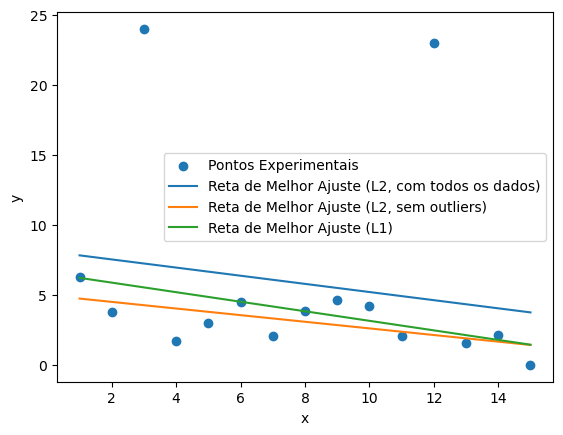

In [76]:
using PyPlot


figure()

# Plotagem dos pontos e das retas de melhor ajuste
scatter(x, y, label="Pontos Experimentais")
plot(x, y_previsto, label="Reta de Melhor Ajuste (L2, com todos os dados)")
plot(x, y_previsto_sem_outliers, label="Reta de Melhor Ajuste (L2, sem outliers)")
plot(x, y_previsto_L1_optimal, label="Reta de Melhor Ajuste (L1)")
xlabel("x")
ylabel("y")
legend()

display(gcf())

A função de custo \(L_1\) evidencia uma notável robustez diante de outliers, contrastando com o método de mínimos quadrados \(L_2\). A reta de melhor ajuste \(L_1\) demonstra menor sensibilidade a valores extremos, minimizando a influência desses pontos discrepantes na determinação dos coeficientes da reta. Essa resistência se destaca na minimização da soma dos valores absolutos dos resíduos, proporcionando uma abordagem mais eficaz quando a presença de outliers é uma consideração crítica. Em contrapartida, o método \(L_2\) mostra-se mais suscetível a distorções, pois enfatiza a minimização do erro quadrático, o que resulta em uma reta de melhor ajuste mais influenciada pelos valores extremos.

Dessa forma, a análise sugere que a função de custo \(L_1\) oferece uma escolha mais robusta e adequada quando há a presença de outliers, proporcionando coeficientes de reta que melhor representam os dados típicos. Por outro lado, o método \(L_2\) mostra-se menos resistente a influências externas, podendo resultar em estimativas menos precisas da tendência subjacente dos dados, especialmente em cenários com valores discrepantes.

### Problema 4 (QP): (Continuação do problema anterior)
Outra abordagem é utilizar custo $L_2$ para pontos próximos à reta, porém custo $L_1$ para pontos que estão longes da reta. Especificamente, seguindo o estatístico Huber, define-se a função de custo:
\begin{equation}
\phi(x) =
    \left\{
        \begin{array}{l}
            x^2, \quad \text{if}~-M \leq x \leq M \\
            2M|x| - M^2 \quad \text{senão}
        \end{array}
     \right.
\end{equation}
Embora a fórmula seja simples, ela precisa ser manipulada para que fique no formato de um programa quadrático e convexo, e essa manipulação resulta no seguinte QP convexo:
\begin{equation}
\phi(x) =
    \left\{
        \begin{array}{l}
            \text{minimize}_{v,w}~ w^2 + 2 Mv \\
            \text{sujeito a}~|x| \leq w + v \\
            \qquad v \geq 0, w \leq M
        \end{array}
     \right.
\end{equation}
Utilize $M=1$, e plote a função $\phi(x), -3 \leq x \leq 3$ gerada por ambas as expressões acima e verifique que são, de fato, equivalentes. Finalmente, encontre a reta de melhor ajuste aos dados especificados em Q.1, plotando seu resultado. A função objetivo para esta parte é:
\begin{equation}
\sum_{i=1}^{15} \phi(y_i - ax_i - b)
\end{equation}

### Primeira parte: Mostrando equivalência dos modelos

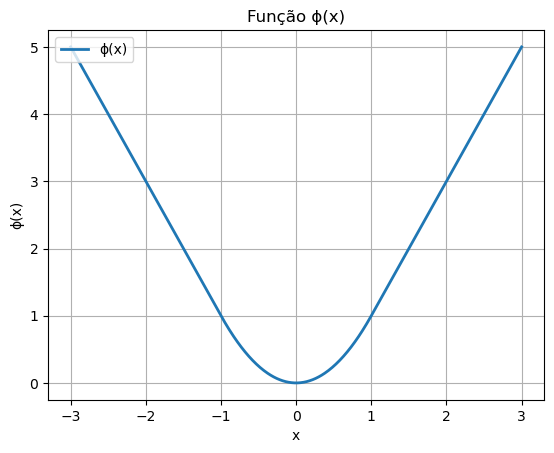

In [78]:
# Modelo 1: Plotando a função ϕ(x) diretamente

using PyPlot

M = 1
x = -3:0.01:3

# Definir a função phi(x)
function phi(x)
    if -M <= x <= M
        return x^2
    else
        return 2M * abs(x) - M^2
    end
end

phi_values = [phi(x_i) for x_i in x]

# Plotar a função phi(x)
figure()
plot(x, phi_values, label="ϕ(x)", linewidth=2)
xlabel("x")
ylabel("ϕ(x)")
legend(loc="upper left")
title("Função ϕ(x)")
grid(true)
display(gcf())

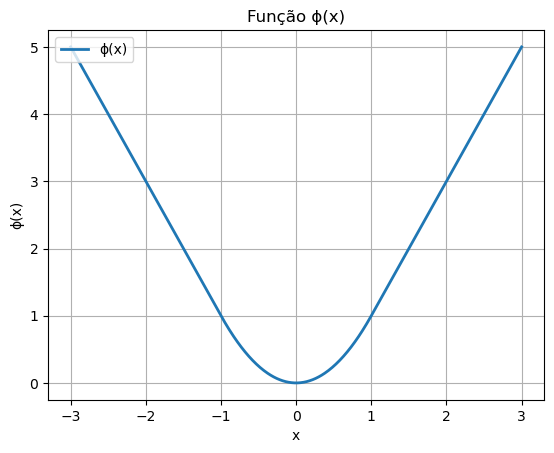

In [4]:
using JuMP, Ipopt, PyPlot

# Função para modelar a função phi(x)
function phi_2(x, M)
    n = length(x)

    # Criar o modelo de otimização
    modelo = Model(Ipopt.Optimizer)
    set_optimizer_attribute(modelo, "print_level", 0)  # Configuração para modo silencioso

    # Variáveis de decisão
    @variable(modelo, v[1:n] >= 0)
    @variable(modelo, w[1:n] <= M)

    # Função objetivo vetorizada
    @objective(modelo, Min, sum(w.^2 + 2*M*v))

    # Restrições vetorizadas
    @constraint(modelo, abs.(x) .<= w + v)

    # Resolver o modelo
    optimize!(modelo)

    # Retornar os valores ótimos do objetivo
    return value.(w).^2 + 2*M*value.(v)
end

M = 1
x = -3:0.01:3

phi_values_2 = phi_2(x, M)

# Plotar a função phi(x)
figure()
plot(x, phi_values_2, label="ϕ(x)", linewidth=2)
xlabel("x")
ylabel("ϕ(x)")
legend(loc="upper left")
title("Função ϕ(x)")
grid(true)
display(gcf())

### Segunda parte: Reta de melhor ajuste

In [12]:
using JuMP, NLopt

# Dados de entrada
x_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y_data = [6.31, 3.78, 24, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 4.25, 2.06, 23, 1.58, 2.17, 0.02]

# Modelo de otimização
model = Model(optimizer_with_attributes(NLopt.Optimizer, "algorithm" => :LN_COBYLA))

@variable(model, a)
@variable(model, b)

# Função de custo ϕ
function phi(x, M=1)
    if abs(x) <= M
        return x^2
    else
        return 2M * abs(x) - M^2
    end
end

# Adicionar variáveis auxiliares para lidar com o valor absoluto
@variable(model, t[1:length(x_data)])

# Minimizar a soma dos custos ϕ
@NLobjective(model, Min, sum(phi(y_data[i] - a * x_data[i] - b) for i in 1:length(x_data)))

# Restrições para lidar com o valor absoluto
@constraint(model, t .>= y_data - a * x_data - b)
@constraint(model, t .>= -(y_data - a * x_data - b))

# Resolvendo o problema de otimização
optimize!(model)

# Parâmetros otimizados da reta de melhor ajuste
a_opt = value(a)
b_opt = value(b)

# Gerar pontos para a reta de melhor ajuste
x_fit = range(1, stop=15, length=100)
y_fit = a_opt * x_fit .+ b_opt


┌ Warning: Function phi automatically registered with 1 arguments.
│ 
│ Calling the function with a different number of arguments will result in an
│ error.
│ 
│ While you can safely ignore this warning, we recommend that you manually
│ register the function as follows:
│ ```Julia
│ model = Model()
│ register(model, :phi, 1, phi; autodiff = true)
│ ```
└ @ MathOptInterface.Nonlinear C:\Users\linco\.julia\packages\MathOptInterface\tWT4o\src\Nonlinear\operators.jl:430


5.456817151871667:-0.03974994449485105:1.521572646881413

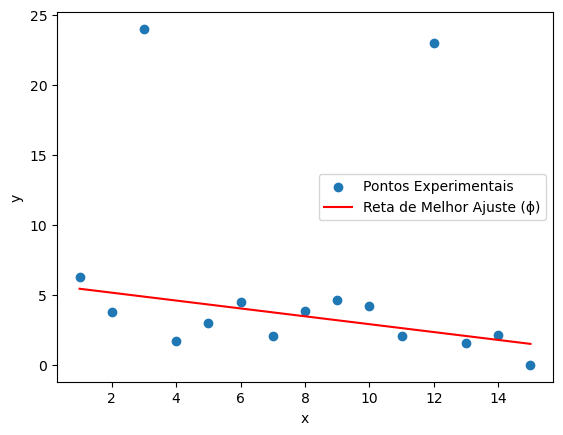

In [14]:
using PyPlot

figure()

# Plotagem dos pontos e das retas de melhor ajuste
scatter(x, y, label="Pontos Experimentais")
plot(x_fit, y_fit, label="Reta de Melhor Ajuste (ϕ)", color="red")
xlabel("x")
ylabel("y")
legend()

display(gcf())

### Problema 5 (Compromisso [tradeoff])
Deseja-se enviar uma sequência de entradas (tensões) ao manipulador do braço de um robô. Os dados se encontram no arquivo *voltages.csv* e estão plotados abaixo.

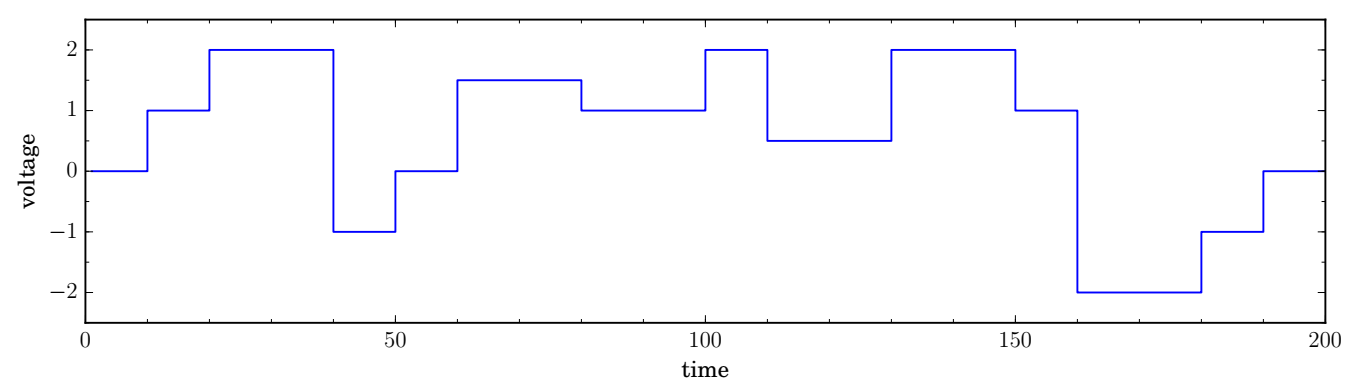

Mudanças bruscas (que ocorrem no gráfico das tensões mostrado acima) danificam os motores do manipulador, portanto deseja-se suavizar as transições (saltos) no sinal. Denotando as tensões por $v_i, i = 1, 2, \ldots, 200$, uma maneira de caracterizar suavidade do sinal é através da soma das diferenças ao quadrado:
\begin{equation}
    R(v) = (v_2 - v_1)^2 + (v_3 - v_2)^2 + \cdots + (v_{200} - v_{199})^2
\end{equation}
Quanto menor $R(v)$, mais suave o sinal. Formule e resolva um problema de mínimos quadrados regularizado que equilibra os dois objetivos de aproximar o sinal mostrado no gráfico acima, porém também impor um certo grau de suavidade. Explique seu raciocínio ao formular o modelo e inclua um gráfico comparando as tensões desejadas com as tensões suavizadas que você gerou através do seu modelo de mínimos quadrados regularizado.

In [15]:
voltages = [
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
0
0
0
0
0
0
0
0
0
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1.5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
0
0
0
0
0
0
0
0
0
0]

200-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

A ideia da solução é a mesma do Problema 2. Nesse sentido, foi reaproveitada a função de gerar a matriz de diferenças e reajustadas as variáveis

In [28]:
function criar_matriz_diferencas(n)
    D = zeros(n-1, n)
    
    for i in 1:n-1
        D[i, i] = -1
        D[i, i+1] = 1
    end
    
    return D
end

D = criar_matriz_diferencas(length(voltages))

m = Model(Ipopt.Optimizer)
set_optimizer_attribute(m, "print_level", 0)

# Variáveis de decisão
@variable(m, v[1:length(voltages)])

# Função objetivo
gamma = 0.8
@objective(m, Min, sum((voltages - v).^2) + gamma * sum((D*v).^2))

# Otimização
optimize!(m)

# Sinal suavizado
v_final = value.(v)


200-element Vector{Float64}:
  2.3294319497454417e-5
  5.241221886927244e-5
  0.00014704539182768106
  0.00042548530457069096
  0.0012357818480270648
  0.00359080570151727
  0.010434336681904062
  0.030320788514670932
  0.08810822599077647
  0.25603094595535264
  ⋮
 -0.08810822599077647
 -0.030320788514670936
 -0.010434336681904063
 -0.0035908057015172704
 -0.001235781848027065
 -0.0004254853045706912
 -0.00014704539182768114
 -5.241221886927249e-5
 -2.3294319497454444e-5

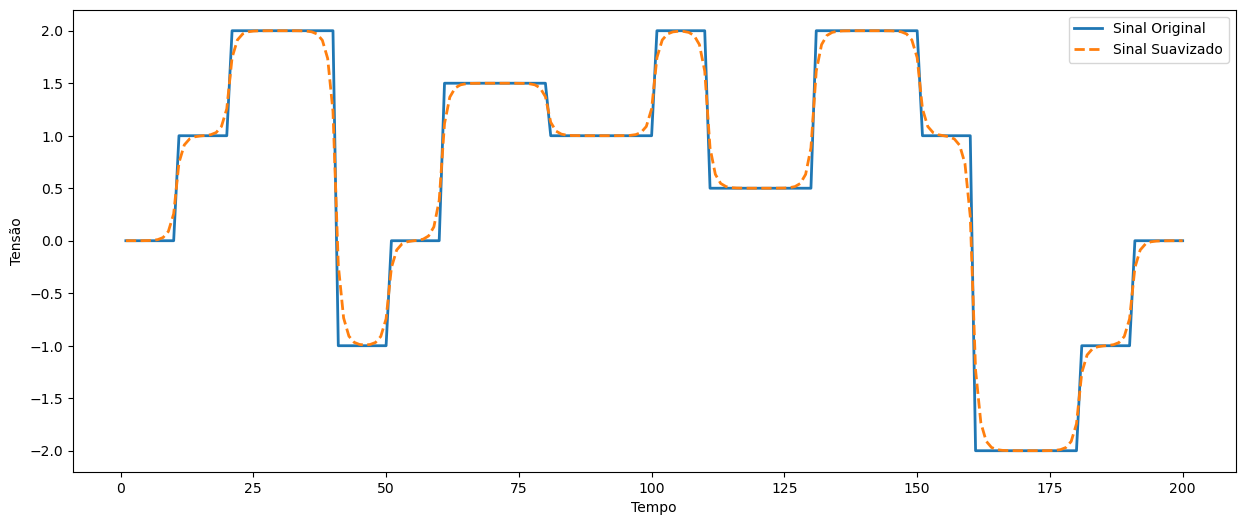

In [29]:
using PyPlot

figure(figsize=(15, 6))

t = 1:length(voltages)
plot(t, voltages, label="Sinal Original", linewidth=2)
plot(t, v_final, label="Sinal Suavizado", linewidth=2, linestyle="--")

xlabel("Tempo")
ylabel("Tensão")
legend()

display(gcf())

### Problema 6 (variáveis binárias): 

Resolva o problema abaixo com variáveis de decisão reais $x_1,x_2 \in {\mathbb{R}}$, usando _qualquer método consistente_ . O símbolo $\vee$ denota o operador lógico OU <b>não exclusivo</b>, e a equação descrevendo as restrições significa que vale OU grupo 1 (as três restrições entre o primeiro par de parênteses), OU grupo 2 (as três restrições entre o segundo par de parênteses) OU grupo 3 (as três restrições entre o terceiro par de parênteses).
$$
	\min_{x_1,x_2}\;  x_1 + 3x_2 
$$
sujeito a:
$$
\left(
\begin{array}{c}
2x_1 - x_2 \geq  -3\\-x_1 + x_2 \geq 2 \\ x_1 \geq 0
\end{array}
\right)
\vee
\left(
\begin{array}{c}
4x_1 - 2x_2 \geq  4\\-2x_1 + 2x_2 \geq -2 \\ x_1 +x_2 \geq 2
\end{array}
\right)
\vee
\left(
\begin{array}{c}
6x_1 - 3x_2 \geq  0\\-3x_1 + 3x_2 \geq 1 \\ 2x_1 + 3x_2 \geq 3
\end{array}
\right)
$$
O problema é convexo? Reformule como MILP.


<b>Sugestão</b>: Para a reformulação MILP introduza variáveis binárias $\delta_i$, $i=1,2,3$, para cada conjunto de restrições (entre parênteses). Ou seja, se escrever as restrições como $P$ ou $Q$ ou $R$, associa-se $\delta_1$ a $P$, $\delta_2$ a $Q$ e $\delta_3$ a $R$.


In [32]:
using JuMP, Cbc

function problema()
    model = Model(Cbc.Optimizer)

    @variable(model, x1 >= 0)
    @variable(model, x2)
    @variable(model, delta[1:3], binary=true)

    @objective(model, Min, x1 + 3x2)

    # Restrições para o grupo 1
    @constraint(model, 2x1 - x2 + delta[1]*(-3) >= 0)
    @constraint(model, -x1 + x2 + delta[1]*(-2) >= 0)
    @constraint(model, x1 + delta[1]*(-1) >= 0)

    # Restrições para o grupo 2
    @constraint(model, 4x1 - 2x2 + delta[2]*(-4) >= 0)
    @constraint(model, -2x1 + 2x2 + delta[2]*(2) >= 0)
    @constraint(model, x1 + x2 + delta[2]*(-2) >= 0)

    # Restrições para o grupo 3
    @constraint(model, 6x1 - 3x2 + delta[3]*(0) >= 0)
    @constraint(model, -3x1 + 3x2 + delta[3]*(-1) >= 0)
    @constraint(model, 2x1 + 3x2 + delta[3]*(-3) >= 0)

    # Apenas um grupo de restrições pode ser ativo
    @constraint(model, sum(delta) == 1)

    optimize!(model)

    println("Status da otimização: ", termination_status(model))
    println("x1 = ", value(x1))
    println("x2 = ", value(x2))
    println("delta = ", value.(delta))
    println("Valor ótimo da função objetivo: ", objective_value(model))
end

problema()


Welcome to the CBC MILP Solver 
Version: 2.10.8 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 2.46316 - 0.01 seconds
Cgl0004I processed model has 10 rows, 5 columns (3 integer (3 of which binary)) and 28 elements
Cbc0038I Initial state - 3 integers unsatisfied sum - 0.105263
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. 2.625 iterations 2
Cbc0038I Solution found of 2.625
Cbc0038I Relaxing continuous gives 2.6
Cbc0038I Before mini branch and bound, 0 integers at bound fixed and 0 continuous
Cbc0038I Full problem 10 rows 5 columns, reduced to 9 rows 5 columns
Cbc0038I Mini branch and bound did not improve solution (0.02 seconds)
Cbc0038I Round again with cutoff of 2.58631
Cbc0038I Pass   2: suminf.    0.01053 (2) obj. 2.58631 iterations 2
Cbc0038I Pass   3: suminf.    0.20511 (3) obj. 2.58631 iterations 3
Cbc0038I Pass   4: suminf.    0.01053 (2) obj. 2.58631 iterations 3
Cbc0038I Pass   5: suminf.    0.20511 (3


x1 = 0.4000000000000001
x2 = 0.7333333333333334


delta = [0.0, 0.0, 1.0]


Valor ótimo da função objetivo: 2.5999999999999996
0
Cbc0014I Cut generator 5 (FlowCover) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 7 (ZeroHalf) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0001I Search completed - best objective 2.6, took 0 iterations and 0 nodes (0.03 seconds)
Cbc0035I Maximum depth 0, 0 variables fixed on reduced cost
Cuts at root node changed objective from 2.46316 to 2.6
Probing was tried 1 times and created 2 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerR

# Problema 7 (QP, formulação matemática)

(<i>Localização ótima de um helicóptero de resgate</i>) Sejam $(x,y)$ as coordenadas da base de um helicóptero de resgate e $(0,0), (5,-1), (4,6), (1,3)$ as coordenadas dos pontos nos quais o helicóptero tem que buscar vítimas (= pontos de resgate), mais rapidamente possível. Supondo que o helicóptero sempre se desloca numa velocidade constante, formule como problema de otimização, especificando claramente a função objetivo <b>[1.0 ponto]</b>, variáveis de decisão <b>[0.5 pontos]</b>, e restrições <b>[0.5 pontos]</b>. Encontre a solução numérica, utilizando JuMP <b>[bônus de 1 ponto]</b>. 

_Sugestão_: É preciso minimizar a máxima distância entre a base e os pontos de resgate. Ou seja,  todos os pontos de resgate devem estar dentro do raio de ação helicóptero,  e deseja-se minimizar este raio.

### Formulação Matemática:

**Variáveis de Decisão:**
- Sejam \(x\) e \(y\) as coordenadas da base do helicóptero de resgate.

**Função Objetivo:**
- Minimizar o raio de ação do helicóptero, representado pela distância máxima entre a base do helicóptero e qualquer ponto de resgate. A função objetivo pode ser formulada como:
  $$ \text{Min} \quad r $$
  onde \(r\) é o raio de ação do helicóptero, e r = max\{distância até o ponto de resgate\}.

**Restrições:**
- As coordenadas dos pontos de resgate \((0,0), (5,-1), (4,6), (1,3)\) devem estar dentro do raio de ação do helicóptero. A distância entre a base do helicóptero e cada ponto de resgate deve ser menor ou igual ao raio de ação \(r\):
  $$ \sqrt{(x - 0)^2 + (y - 0)^2} \leq r $$
  $$ \sqrt{(x - 5)^2 + (y - (-1))^2} \leq r $$
  $$ \sqrt{(x - 4)^2 + (y - 6)^2} \leq r $$
  $$ \sqrt{(x - 1)^2 + (y - 3)^2} \leq r $$
- As coordenadas do helicóptero devem estar dentro de uma área restrita. Isso pode ser limitado por um retângulo que engloba todos os pontos de resgate, garantindo que a base do helicóptero esteja em uma posição realista em relação aos pontos de resgate.

In [47]:
using JuMP, Ipopt

# Pontos de resgate
rescue_points = [(0, 0), (5, -1), (4, 6), (1, 3)]

# Modelo de otimização
model = Model(Ipopt.Optimizer)
set_optimizer_attribute(model, "print_level", 0)

# Variáveis de decisão
@variable(model, x)
@variable(model, y)
@variable(model, r >= 0)  # Raio de ação do helicóptero

# Função objetivo: Minimizar o raio de ação
@objective(model, Min, r)

# Restrições
for point in rescue_points
    @constraint(model, (x - point[1])^2 + (y - point[2])^2 <= r^2)
end

# Otimização
optimize!(model)

# Coordenadas ótimas do helicóptero
x_optimal = value(x)
y_optimal = value(y)

# Raio de ação ótimo
r_optimal = value(r)

println("Coordenadas ótimas: ($x_optimal, $y_optimal)")
println("Raio de ação ótimo: $r_optimal")

Coordenadas ótimas: (3.0588235002851993, 2.294117622449074)
Raio de ação ótimo: 3.823529380637718


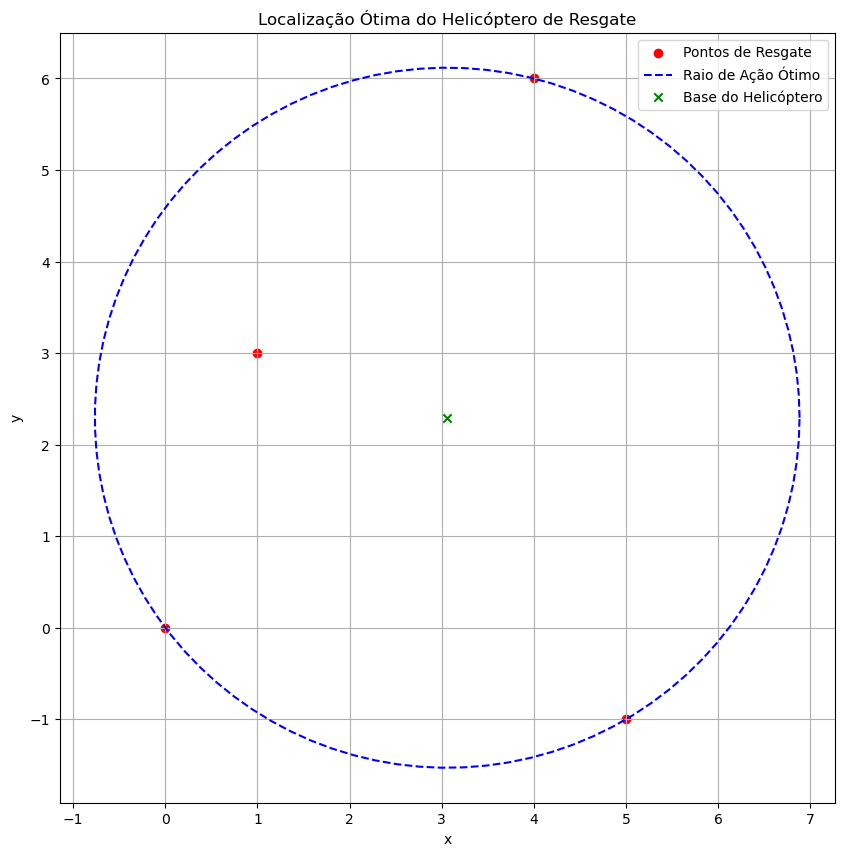

In [45]:
using PyPlot

# Pontos de resgate
rescue_points = [(0, 0), (5, -1), (4, 6), (1, 3)]

# Coordenadas ótimas do helicóptero e raio de ação ótimo
x_optimal = value(x)
y_optimal = value(y)
r_optimal = value(r)

# Gerar pontos para desenhar o círculo representando o raio de ação
theta = range(0, stop=2π, length=100)
circle_x = x_optimal .+ r_optimal * cos.(theta)
circle_y = y_optimal .+ r_optimal * sin.(theta)

# Plotar a região do problema
figure(figsize=(10, 10))
scatter([point[1] for point in rescue_points], [point[2] for point in rescue_points], label="Pontos de Resgate", color="red")
plot(circle_x, circle_y, label="Raio de Ação Ótimo", color="blue", linestyle="--")
scatter(x_optimal, y_optimal, label="Base do Helicóptero", color="green", marker="x")
xlabel("x")
ylabel("y")
legend()
title("Localização Ótima do Helicóptero de Resgate")
grid(true)
display(gcf())


### Problema 8 (MA, AR, ARMA via mínimos quadrados)

There are many ways to model the relationship between an input sequence $\{u_1, u_2,\dots\}$ and an output sequence $\{y_1, y_2,\dots\}$. In class, we saw the moving average (MA) model, where each output is approximated by a linear combination of the k most recent inputs:
$$ \text{MA:}\quad y_t \approx b_1u_t + b_2u_{t-1} + \dots + b_ku_{t-k+1} $$

We then used least-squares to find the coefficients $b_1,\dots, b_k$. What if we didn’t have access to the inputs at all, and we were asked to predict future y values based only on the previous y values? One way to do this is by using an autoregressive (AR) model, where each output is approximated by a linear combination of the $\ell$ most recent outputs (excluding the present one):
$$ \text{AR:}\quad y_t \approx a_1y_{t-1} + a_2y_{t-2} + \dots + a_\ell y_{t-\ell} $$

Of course, if the inputs contain pertinent information, we shouldn’t expect the AR method to outperform the MA method!

a) Using the same dataset from class uy_data.csv, plot the true y, and on the same axes, also plot the estimated $\hat y$ using the MA model and the estimated $\hat y$ using the AR model. Use $k = 5$ for both models. To quantify the difference between estimates, also compute $\|y - \hat h\|$ for both cases.

b) Yet another possible modeling choice is to combine both AR and MA. Unsurprisingly, this is called the autoregressive moving average (ARMA) model:
$$ \text{ARMA:}\quad y_t \approx a_1y_{t-1} + a_2y_{t-2} + \dots + a_\ell y_{t-\ell} + b_1u_t + b_2u_{t-1} + \dots + b_ku_{t-k+1} $$

Solve the problem once more, this time using an ARMA model with $k = \ell = 1$. Plot $y$ and $\hat y$ as before, and also compute the error $\|y - \hat y\|$.

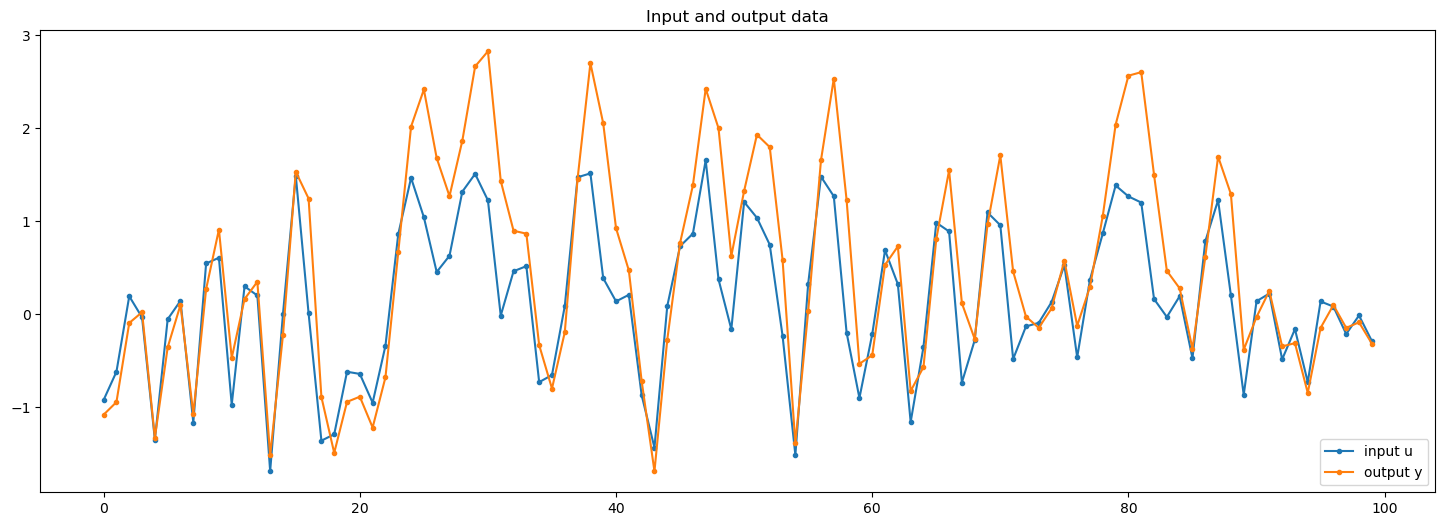

In [58]:
raw = [-0.9188 -1.0773
-0.6159 -0.9419
0.1959 -0.0915
-0.0316 0.0245
-1.3455 -1.3239
-0.0513 -0.3536
0.1471 0.1032
-1.1615 -1.0702
0.5478 0.2722
0.6096 0.9127
-0.9706 -0.4672
0.3018 0.1654
0.2039 0.3515
-1.6833 -1.5158
0.0057 -0.2207
1.4925 1.5337
0.0113 1.2458
-1.3563 -0.8868
-1.288 -1.488
-0.6159 -0.9394
-0.639 -0.884
-0.9488 -1.2152
-0.3364 -0.6755
0.8631 0.6695
1.4679 2.0192
1.0442 2.4178
0.4562 1.6812
0.6309 1.2713
1.3197 1.8668
1.5108 2.6653
1.2262 2.8286
-0.0127 1.4358
0.4645 0.8995
0.5191 0.8685
-0.7274 -0.3292
-0.6509 -0.7965
0.0901 -0.1906
1.4747 1.4607
1.5163 2.7007
0.3898 2.0539
0.1405 0.9278
0.2109 0.4734
-0.8675 -0.7146
-1.4313 -1.6855
0.0905 -0.2711
0.7334 0.7681
0.8687 1.3874
1.658 2.4258
0.3784 2.0024
-0.1594 0.6279
1.2091 1.3279
1.0389 1.9324
0.7494 1.7987
-0.229 0.5894
-1.5111 -1.3858
0.3298 0.0347
1.481 1.6587
1.2702 2.5347
-0.1956 1.2286
-0.8984 -0.53
-0.2123 -0.4387
0.6902 0.5329
0.3256 0.7312
-1.1566 -0.823
-0.349 -0.5661
0.9869 0.8105
0.892 1.5486
-0.7315 0.1209
-0.2765 -0.2639
1.0961 0.9674
0.959 1.7094
-0.4793 0.4625
-0.129 -0.0227
-0.0896 -0.1439
0.1326 0.0645
0.5292 0.5793
-0.4606 -0.1214
0.3742 0.298
0.8715 1.0606
1.3862 2.0386
1.2687 2.5662
1.203 2.6041
0.166 1.5009
-0.0269 0.4687
0.1963 0.2807
-0.4706 -0.3694
0.7855 0.617
1.2281 1.6969
0.205 1.2934
-0.8645 -0.3791
0.1419 -0.0276
0.2251 0.2533
-0.4831 -0.3436
-0.1577 -0.3082
-0.7281 -0.8429
0.1397 -0.1449
0.0851 0.1008
-0.2105 -0.1442
-0.011 -0.0843
-0.2845 -0.3122]

u = raw[:,1];
y = raw[:,2];
T = length(u)

# plot the u and y data
using PyPlot
PyPlot.svg(true)

figure(figsize=(18,6))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");
title("Input and output data");
display(gcf())

### 8-a)

In [64]:
function ma_model(u, y, width)
    """
    Ajusta um modelo de Média Móvel (MA) aos dados de séries temporais.

    Parâmetros:
        u: Vetor de valores da série temporal de entrada.
        y: Vetor de valores da série temporal de saída.
        width: Largura da janela móvel.

    Retorna:
        yest: Estimativa da série temporal usando o modelo MA.
    """
    T = length(u)
    A = zeros(T, width)

    # Construir a matriz A para o modelo MA
    for i = 1:width
        A[i:end, i] = u[1:end-i+1]
    end

    # Resolver para os coeficientes wopt usando mínimos quadrados
    wopt = A \ y

    # Estimar a saída usando o modelo MA
    yest = A * wopt

    return yest
end

function ar_model(y, width)
    """
    Ajusta um modelo Autorregressivo (AR) aos dados de séries temporais.

    Parâmetros:
        y: Vetor de valores da série temporal.
        width: Largura da janela autorregressiva.

    Retorna:
        yest: Estimativa da série temporal usando o modelo AR.
    """
    T = length(y)
    A = zeros(T, width)

    # Construir a matriz A para o modelo AR
    for i = 1:width
        A[i+1:end, i] = y[1:end-i]
    end

    # Resolver para os coeficientes wopt usando mínimos quadrados
    wopt = A \ y

    # Estimar a série temporal usando o modelo AR
    yest = A * wopt

    return yest
end

width = 5
y_hat_MA = ma_model(u, y, width)
y_hat_AR = ar_model(y, width)

# Mostrar as normas das diferenças entre y e as estimativas
println("MA ||y - y_hat|| = ", norm(y_hat_MA - y))
println("AR ||y - y_hat|| = ", norm(y_hat_AR - y))


MA ||y - y_hat|| = 2.460854388269911
AR ||y - y_hat|| = 7.436691765656793


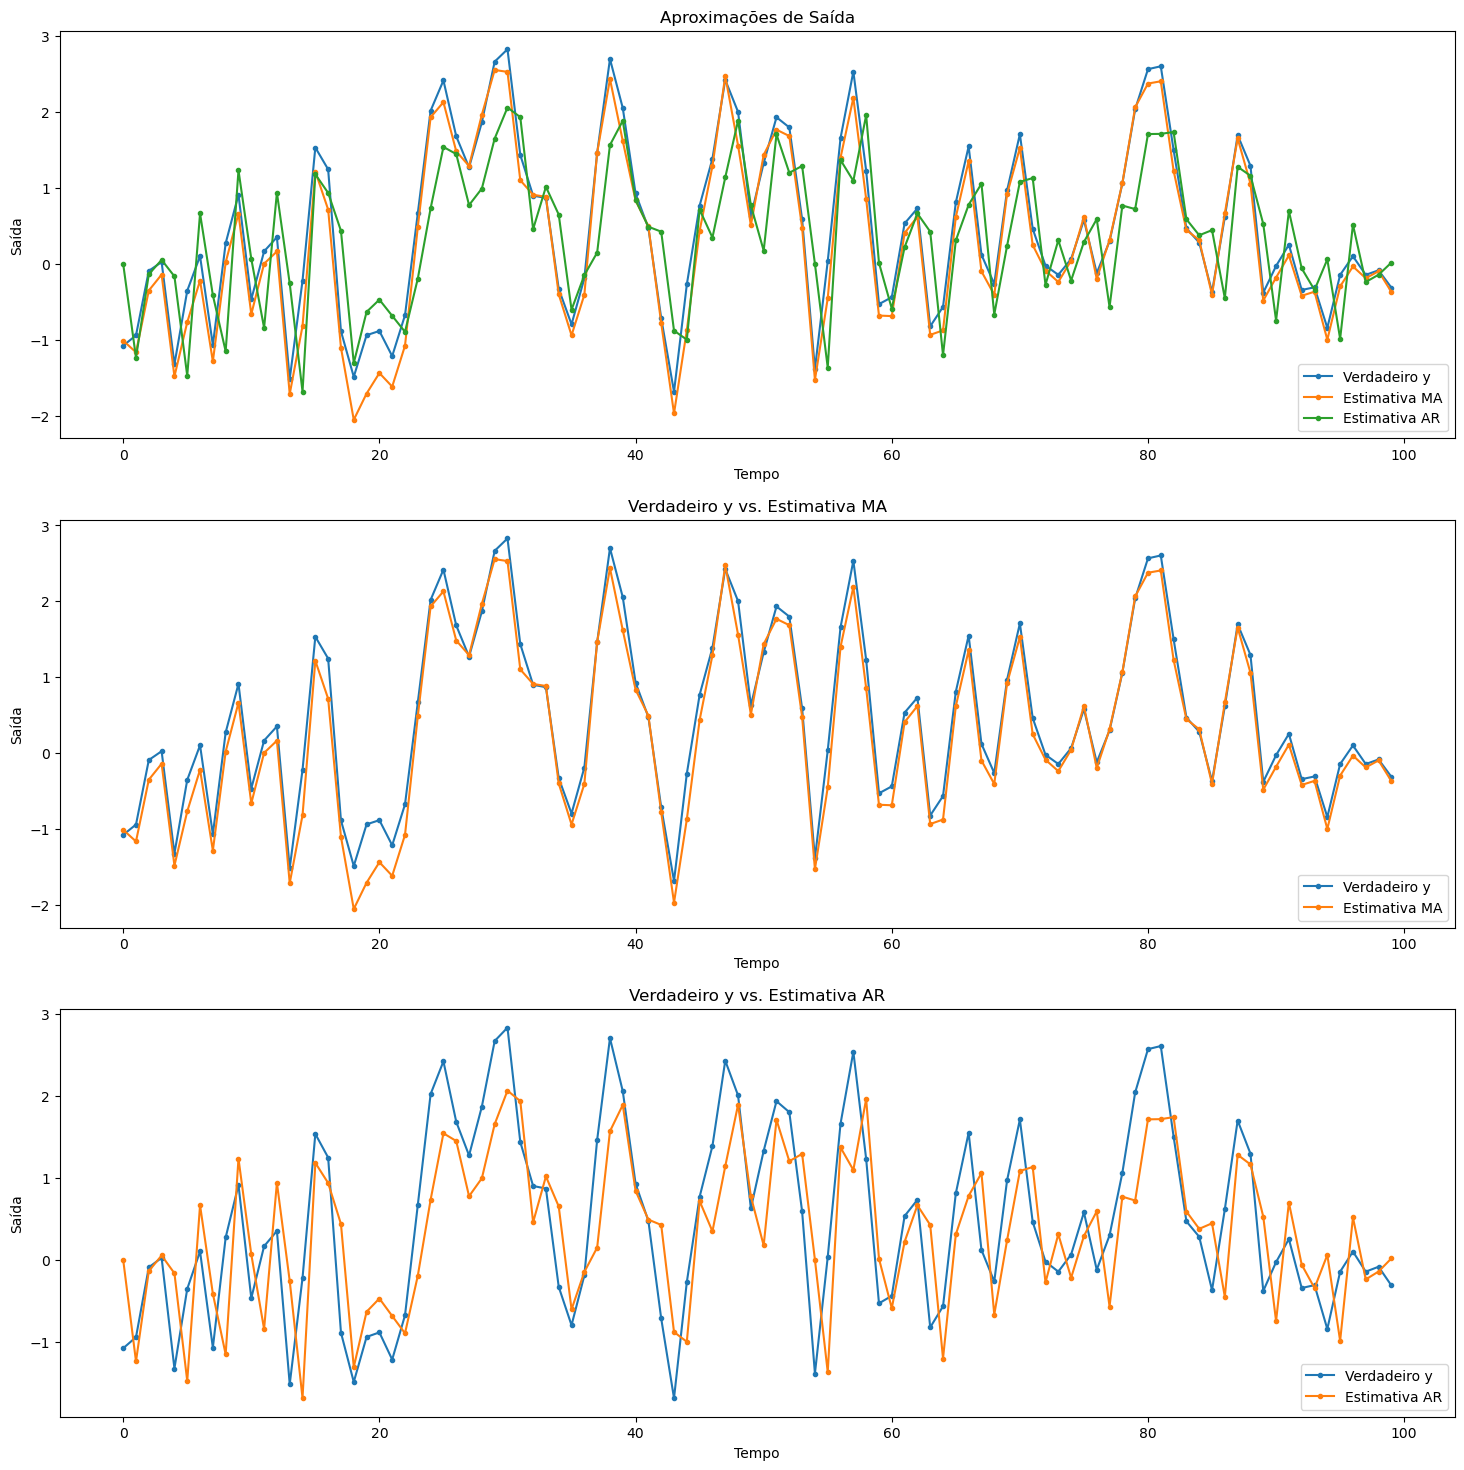

In [67]:
# Gráficos com três subplots: verdadeiro y, y_hat_MA e y_hat_AR
figure(figsize=(18,18))

# Subplot 1
subplot(3, 1, 1)
plot(y, ".-", label="Verdadeiro y")
plot(y_hat_MA, ".-", label="Estimativa MA")
plot(y_hat_AR, ".-", label="Estimativa AR")
legend(loc="lower right")
title("Aproximações de Saída")
xlabel("Tempo")
ylabel("Saída")

# Subplot 2
subplot(3, 1, 2)
plot(y, ".-", label="Verdadeiro y")
plot(y_hat_MA , ".-", label="Estimativa MA")
legend(loc="lower right")
title("Verdadeiro y vs. Estimativa MA")
xlabel("Tempo")
ylabel("Saída")

# Subplot 3
subplot(3, 1, 3)
plot(y, ".-", label="Verdadeiro y")
plot(y_hat_AR, ".-", label="Estimativa AR")
legend(loc="lower right")
title("Verdadeiro y vs. Estimativa AR")
xlabel("Tempo")
ylabel("Saída")

display(gcf())

### 8-b)

In [71]:
function arma_model(u, y)
    T = length(u)
    w1 = 1
    w2 = 1

    # Construir a matriz A para o modelo ARMA
    A = zeros(T, w1 + w2)

    for i = 1:w1
        A[i:end, i] = u[1:end-i+1]
    end

    for i = 1:w2
        A[i+1:end, w1+i] = y[1:end-i]
    end

    # Resolver para os coeficientes wopt usando mínimos quadrados
    wopt = A \ y

    # Estimar a série temporal usando o modelo ARMA
    yest = A * wopt

    return yest
end

# Usar ARMA com k = l = 1
y_hat_ARMA = arma_model(u, y)

# Calcular o erro ||y - y_hat||
error_ARMA = norm(y_hat_ARMA - y)

print("ARMA ||y - y_hat|| = ", error_ARMA)

ARMA ||y - y_hat|| = 1.8565828148734607

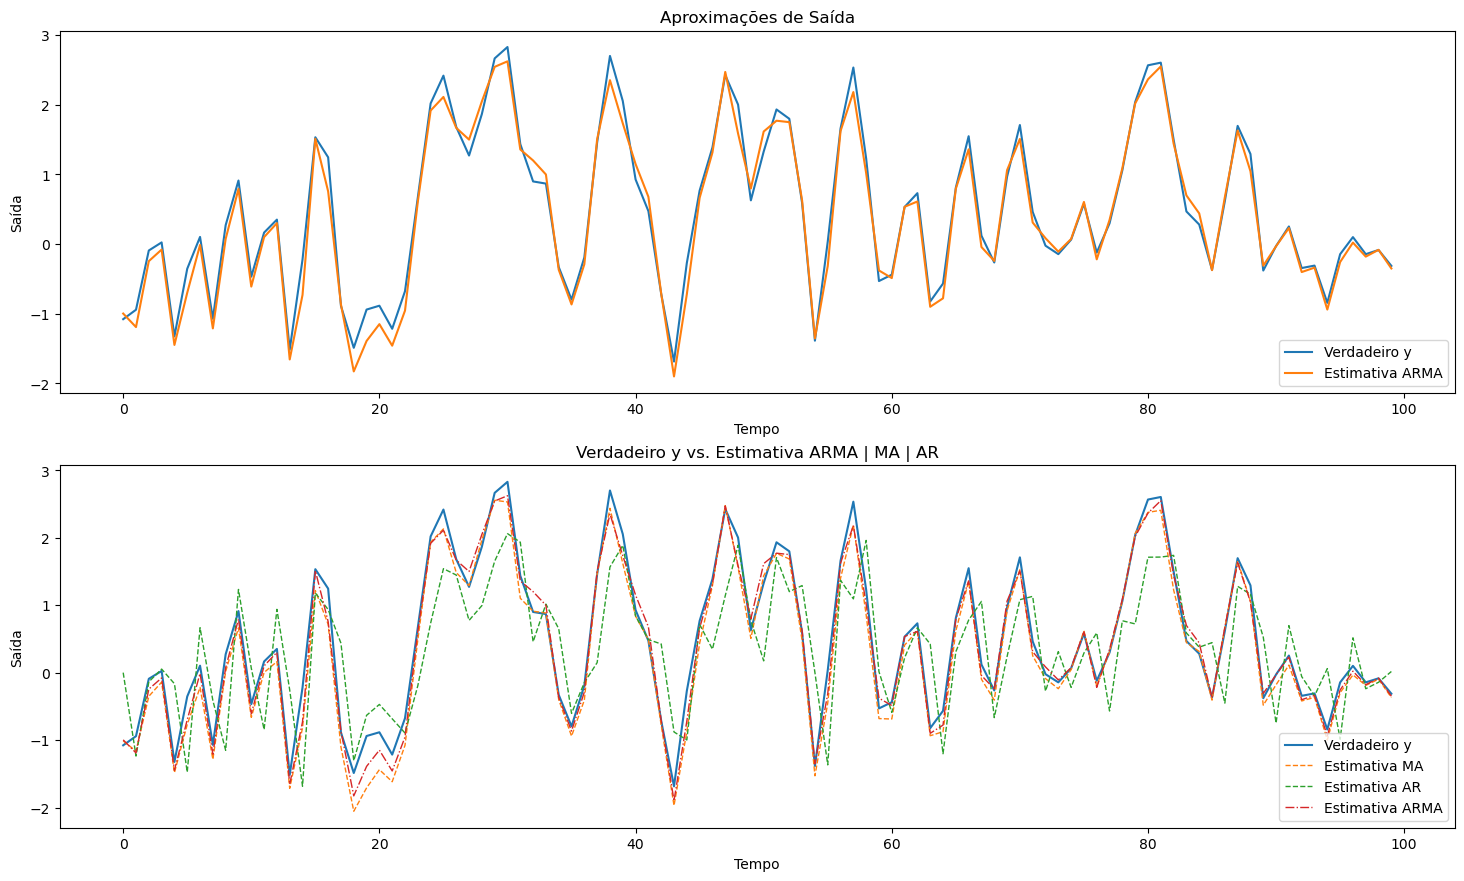

In [81]:
# Gráfico com três subplots: verdadeiro y, y_hat_ARMA e erro
figure(figsize=(18,16))

# Subplot 1
subplot(3, 1, 1)
plot(y, label="Verdadeiro y")
plot(y_hat_ARMA, label="Estimativa ARMA")
legend(loc="lower right")
title("Aproximações de Saída")
xlabel("Tempo")
ylabel("Saída")

# Subplot 2
subplot(3, 1, 2)
plot(y, label="Verdadeiro y")
plot(y_hat_MA, "--", label="Estimativa MA", linewidth=1, )
plot(y_hat_AR, "--", label="Estimativa AR", linewidth=1)
plot(y_hat_ARMA,"-." , label="Estimativa ARMA", linewidth=1)
legend(loc="lower right")
title("Verdadeiro y vs. Estimativa ARMA | MA | AR")
xlabel("Tempo")
ylabel("Saída")


display(gcf())

### Problema 8 (SOCP)
A **mediana geométrica** de um conjunto de pontos $x_i, i = 1,\ldots , k$ em $R^2$ é o ponto $x$ que minimiza a soma das distâncias Euclideanas aos pontos $x_i$, Escreva o problema de encontrar a mediana geométrica de $k$ pontos em $R^2$ como um programa cônico de segunda ordem (SOCP).


A mediana geométrica de um conjunto de pontos $x_i, i = 1, \ldots, k$ em $\mathbb{R}^2$ pode ser encontrada formulando o problema como um Programa Cônico de Segunda Ordem (SOCP). O problema de otimização pode ser definido da seguinte forma:

Seja $x$ o ponto que minimiza a soma das distâncias Euclidianas aos pontos $x_i$:

$$
\text{Minimizar} \quad f(x) = \sum_{i=1}^{k} \|x - x_i\|_2
$$

Onde $f(x)$ é a função a ser minimizada.

O problema SOCP associado a esta formulação é:

$$
\begin{align*}
\text{Minimizar} \quad & t \\
\text{sujeito a} \quad & \|x - x_i\|_2 \leq t, \quad \text{para } i = 1, \ldots, k
\end{align*}
$$

A variável de otimização é $x$, e $t$ é uma variável auxiliar que representa a soma das distâncias Euclidianas.

Este problema pode ser resolvido eficientemente usando solucionadores SOCP disponíveis em pacotes de otimização.

### Problema 9 (NLLS: mínimos quadrados nãolineares)

A series of experiments is conducted to determine the effect of a particular fertilizer on wheat crop yield. Here are the results:

|fertilizer rate ($x$) |	crop yield ($y$) |
|----------------------|---------------------|
|-5 |	127 |
|-3 |	151 |
|-1 |	379
|1 	| 421 |
|3 |	460 |
|5 |	426 |

Such situations typically involve some sort of diminishing returns. So there is a limit to how much the fertilizer can boost the yield. A popular model for this relationship is the following:
$$y=k_1+ k_2 \exp(k_3 x)$$

Use nonlinear least squares to determine the values of $(k_1,k_2,k_3)$
that provide the best fit to the data. We are expecting coefficients in the neighborhood of $(500,-200,-1)$. To display your result, produce a plot of the original data points and the best-fit curve.

### Formulação Matemática:

Seja $x_i$ a taxa de fertilizante e $y_i$ o rendimento da safra correspondente. O modelo de mínimos quadrados não lineares (NLLS) para ajuste dos dados é dado por:

$$ y_i = k_1 + k_2 \exp(k_3 x_i) $$

O objetivo é encontrar os parâmetros $k_1$, $k_2$, e $k_3$ que minimizam a soma dos quadrados dos resíduos entre os valores observados e os valores preditos pelo modelo.

O problema de otimização associado é formulado como:

$$
\text{Minimizar} \quad J(k_1, k_2, k_3) = \sum_{i=1}^{n} (y_i - (k_1 + k_2 \exp(k_3 x_i)))^2
$$

onde $n$ é o número de observações.

Os parâmetros $k_1$, $k_2$, e $k_3$ podem ser estimados minimizando a função objetivo $J$ usando métodos de otimização não lineares.

A solução para este problema fornecerá os valores ótimos para $k_1$, $k_2$, e $k_3$ que resultam no melhor ajuste do modelo aos dados observados. A expectativa é que os coeficientes estejam na vizinhança de $(500, -200, -1)$.

In [99]:
using JuMP, Ipopt

# Dados observados
data = [-5 127; -3 151; -1 379; 1 421; 3 460; 5 426]

# Extrair x e y dos dados
x_data = data[:, 1]
y_data = data[:, 2]

# Criar o modelo de otimização
model = Model(Ipopt.Optimizer)
set_optimizer_attribute(model, "print_level", 0)

# Variáveis de decisão
@variable(model, k[1:3])
set_start_value.(k, [500, -200, -1]) # Valores iniciais para os coeficientes ki

# Expressão não linear
@NLexpression(model, model_expr[i=1:length(x_data)], y_data[i] - (k[1] + k[2] * exp(k[3] * x_data[i])))

# Função objetivo
@NLobjective(model, Min, sum(model_expr[i]^2 for i in 1:length(x_data)))

# Resolver o modelo
optimize!(model)


# Coeficientes ótimos
print(
    "k1 = ", value(k[1]), "\n",
    "k2 = ", value(k[2]), "\n",
    "k3 = ", value(k[3]), "\n",
)
k_optimal = value.(k)

# Gerar pontos para a curva de melhor ajuste
x_fit = range(minimum(x_data), stop=maximum(x_data), length=100)
y_fit = k_optimal[1] .+ k_optimal[2] .* exp.(k_optimal[3] .* x_fit)

k1 = 523.3055369939486
k2 = -156.94784160483005
k3 = -0.1996645707943487


100-element Vector{Float64}:
  97.39198970172441
 105.895831522035
 114.22988459961925
 122.3975389572181
 130.40211693196522
 138.24687452680575
 145.93500273493322
 153.46962883778167
 160.85381767710288
 168.09057290164458
   ⋮
 455.34441645948755
 456.70133647912616
 458.0311640681924
 459.33444015745886
 460.611694877408
 461.8634477738727
 463.09020801937027
 464.2924746202174
 465.47073661951

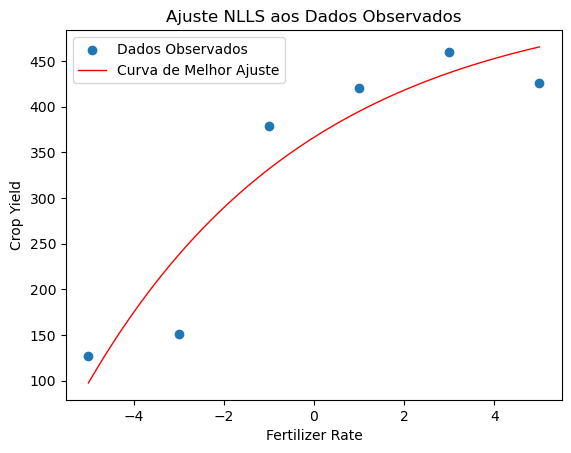

In [102]:
# Plotar os resultados usando PyPlot
figure()
scatter(x_data, y_data, label="Dados Observados")
plot(x_fit, y_fit, label="Curva de Melhor Ajuste", linewidth=1, color="red")
xlabel("Fertilizer Rate")
ylabel("Crop Yield")
legend(loc="upper left")
title("Ajuste NLLS aos Dados Observados")
display(gcf())